In [1]:
# finished.jsonの読み込み
import json
json_open = open("test.json", "r")
json_load = json.load(json_open)
print(len(json_load))
print(json_load[0])

219
{'company_name': '株式会社オリエンタルランド', 'company_code': '4661.T', 'category_original': 'サービス業', 'category_new': 'サービス業', 'value': [['2001-01', '0'], ['2001-02', '0'], ['2001-03', '0'], ['2001-04', '0'], ['2001-05', '0'], ['2001-06', '0'], ['2001-07', '0'], ['2001-08', '0'], ['2001-09', '0'], ['2001-10', '0'], ['2001-11', '0'], ['2001-12', '0'], ['2002-01', '0'], ['2002-02', '0'], ['2002-03', '0'], ['2002-04', '0'], ['2002-05', '0'], ['2002-06', '0'], ['2002-07', '0'], ['2002-08', '0'], ['2002-09', '0'], ['2002-10', '0'], ['2002-11', '0'], ['2002-12', '0'], ['2003-01', '0'], ['2003-02', '0'], ['2003-03', '0'], ['2003-04', '0'], ['2003-05', '0'], ['2003-06', '0'], ['2003-07', '0'], ['2003-08', '0'], ['2003-09', '0'], ['2003-10', '0'], ['2003-11', '0'], ['2003-12', '0'], ['2004-01', '0'], ['2004-02', '0'], ['2004-03', '0'], ['2004-04', '0'], ['2004-05', '0'], ['2004-06', '0'], ['2004-07', '0'], ['2004-08', '0'], ['2004-09', '0'], ['2004-10', '0'], ['2004-11', '0'], ['2004-12', '0'], ['2005-

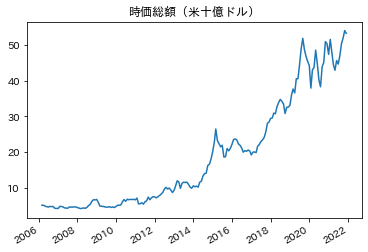

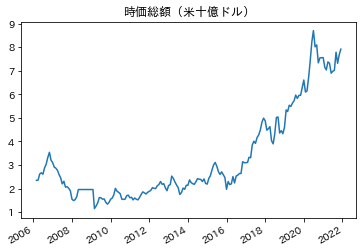

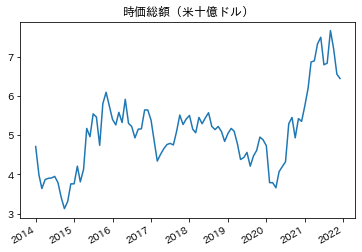

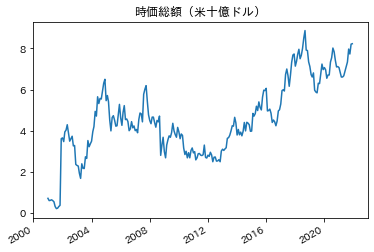

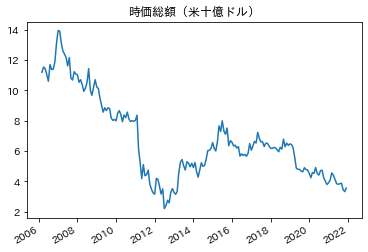

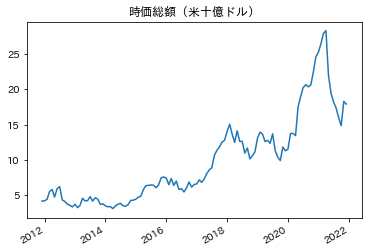

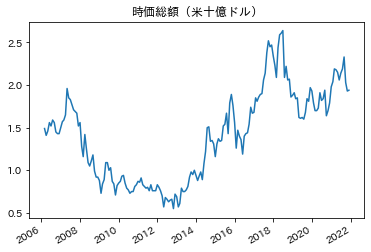

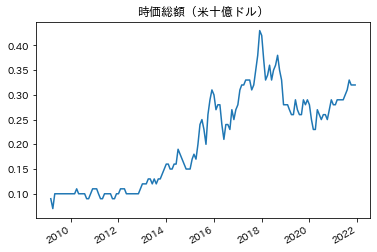

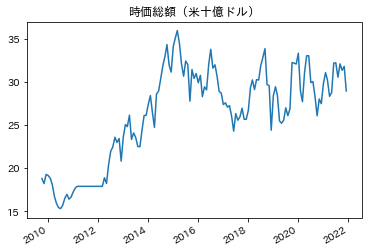

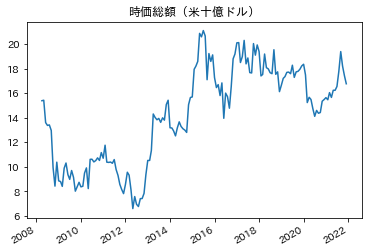

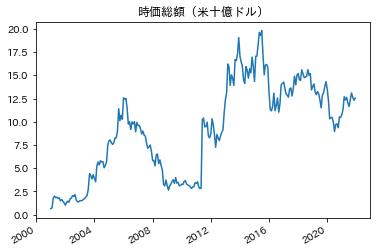

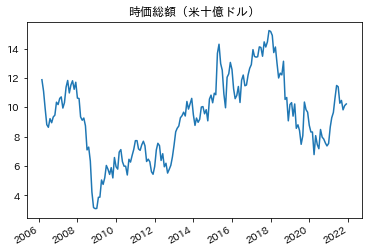

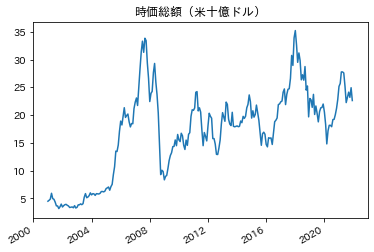

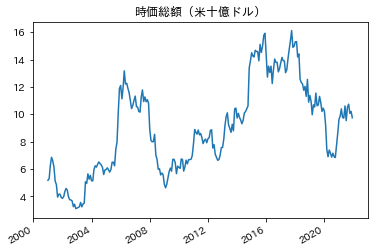

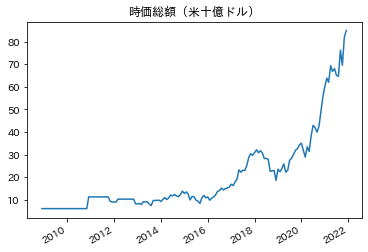

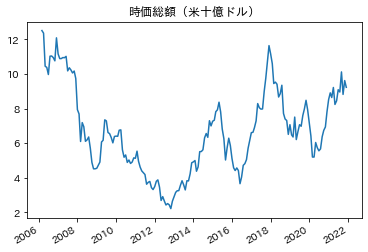

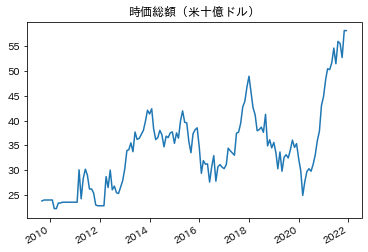

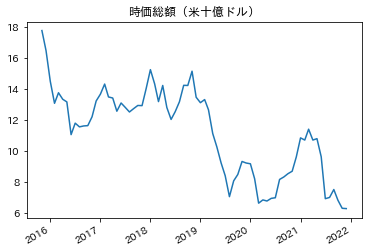

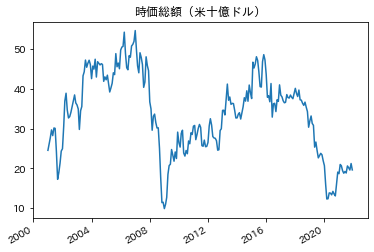

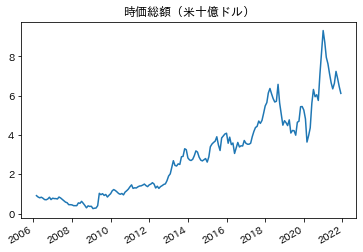

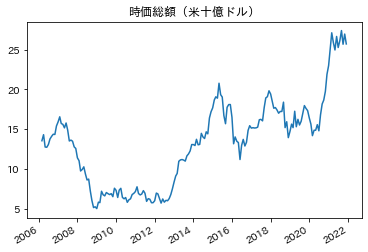

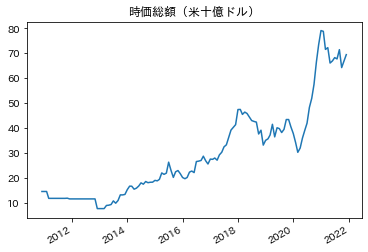

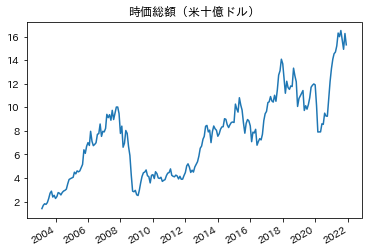

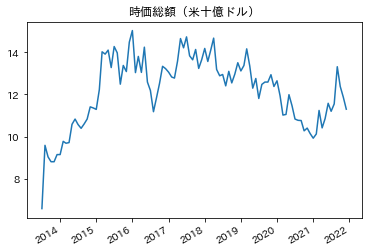

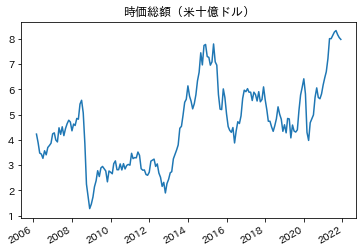

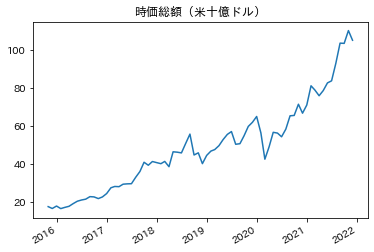

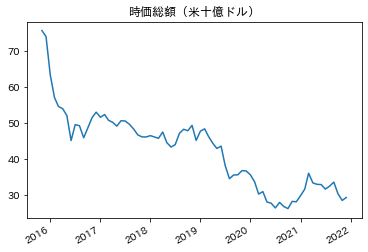

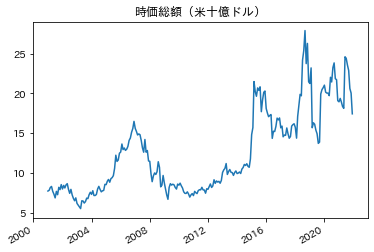

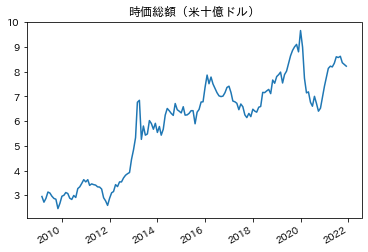

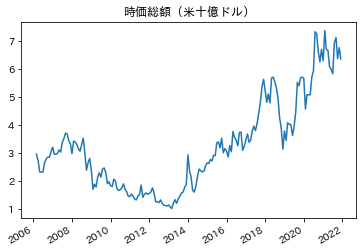

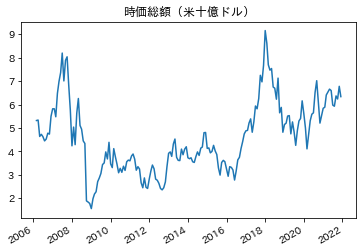

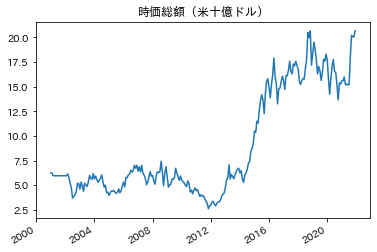

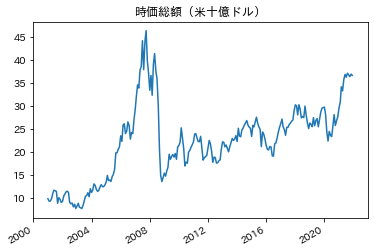

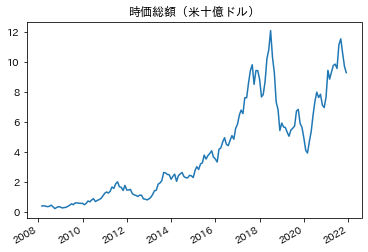

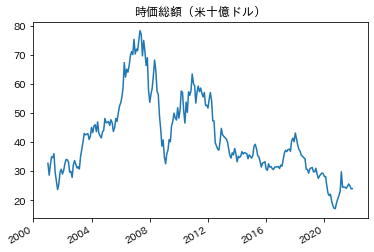

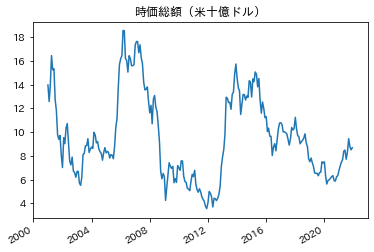

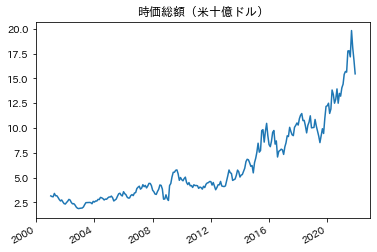

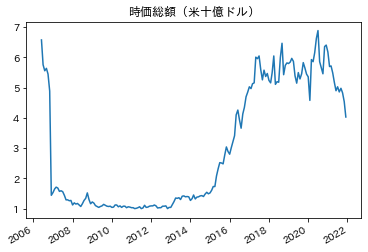

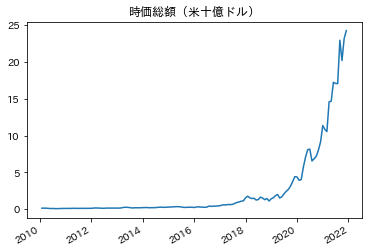

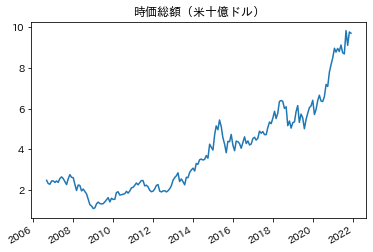

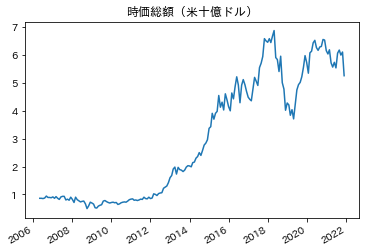

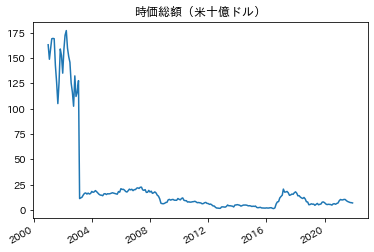

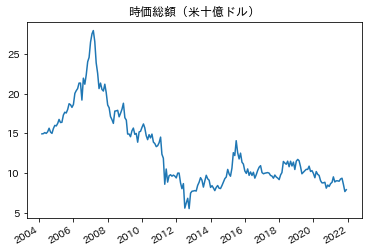

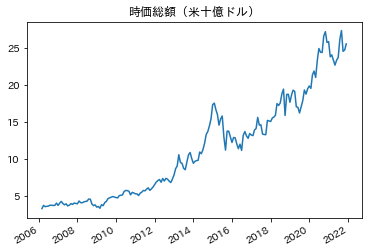

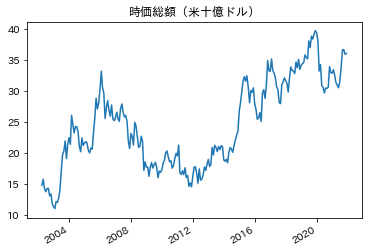

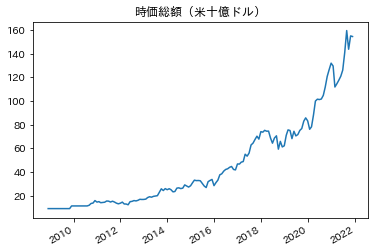

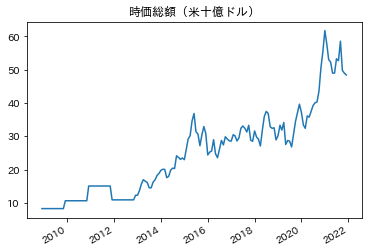

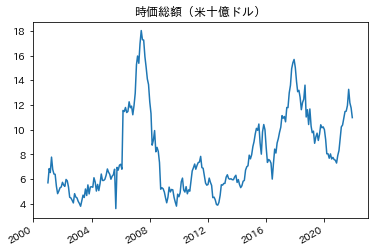

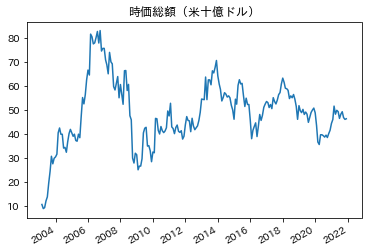

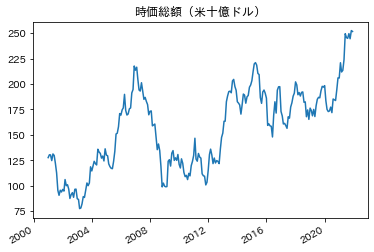

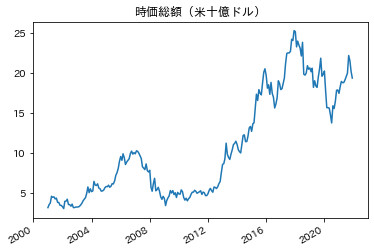

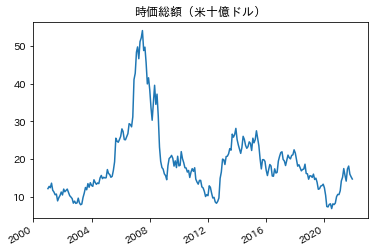

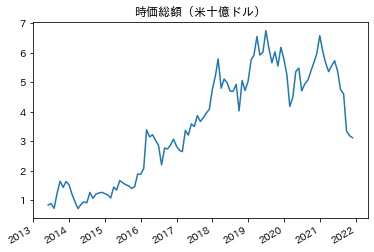

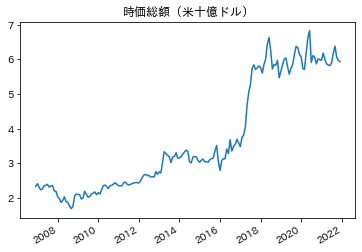

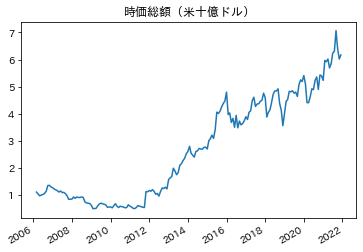

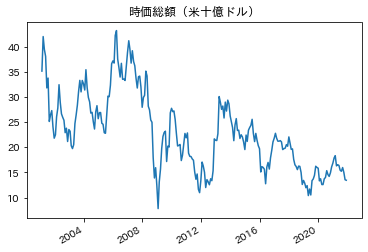

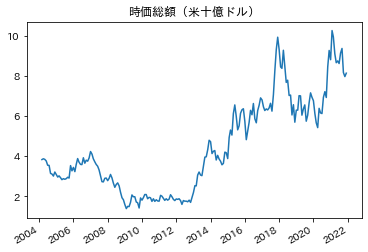

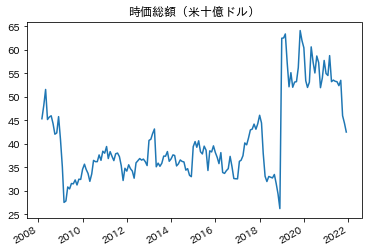

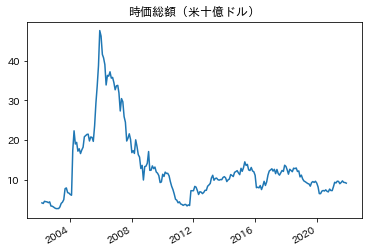

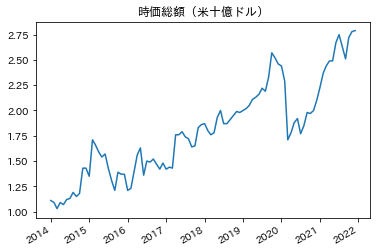

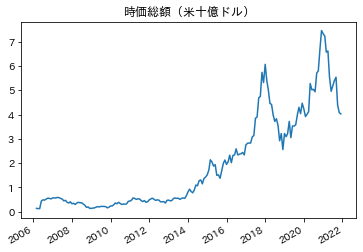

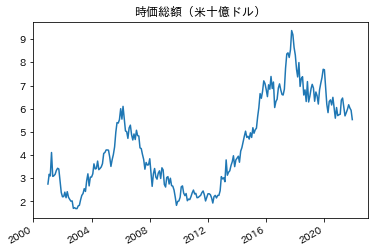

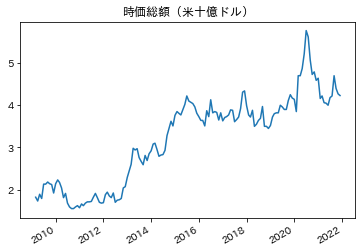

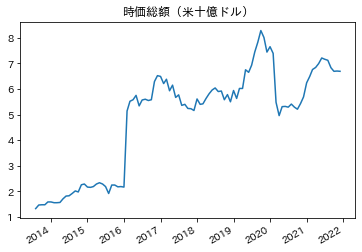

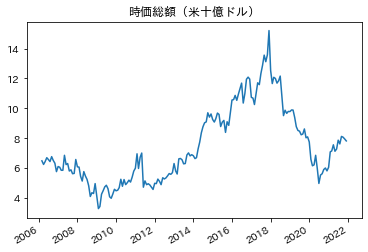

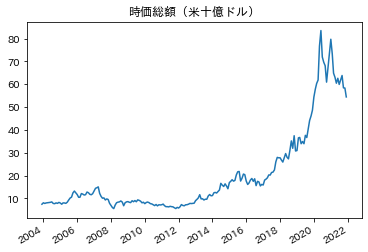

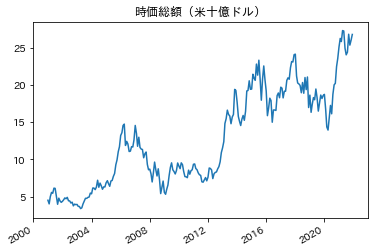

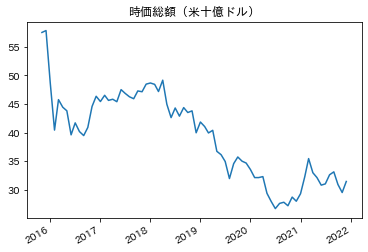

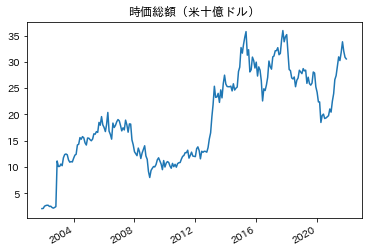

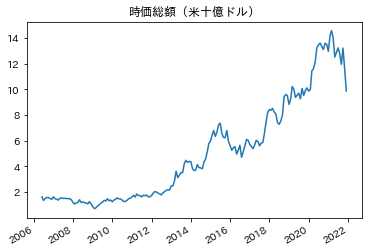

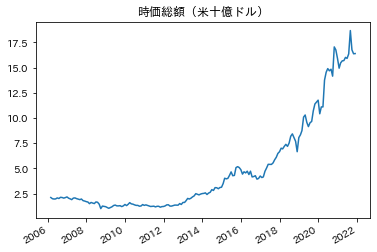

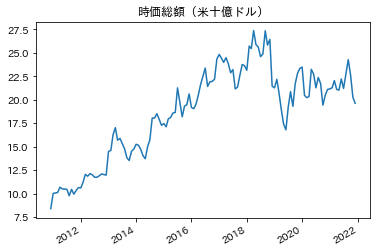

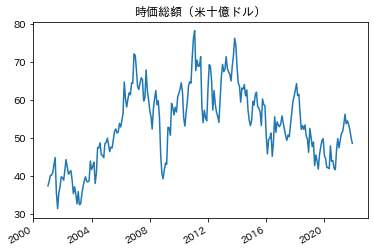

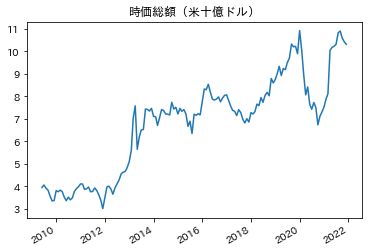

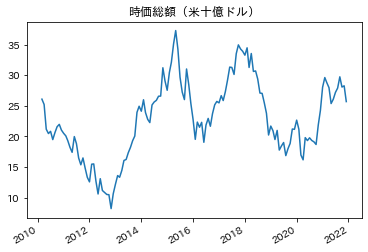

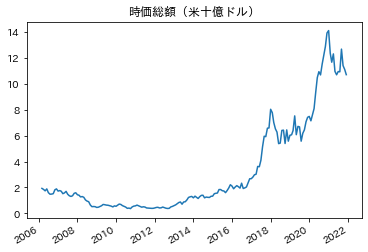

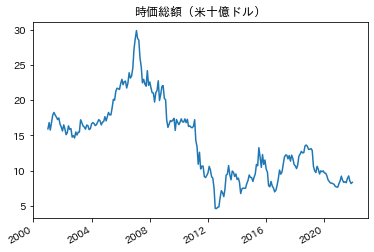

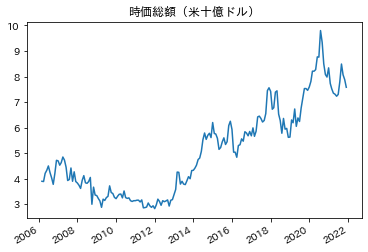

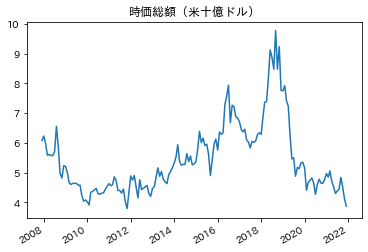

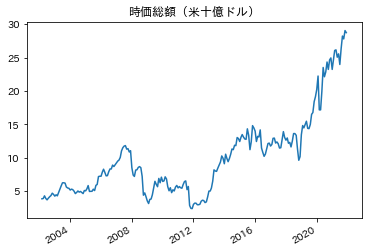

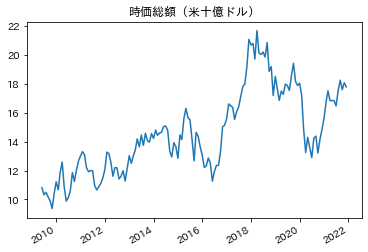

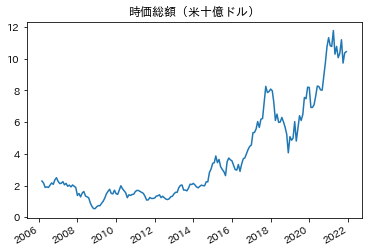

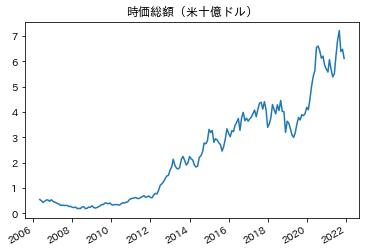

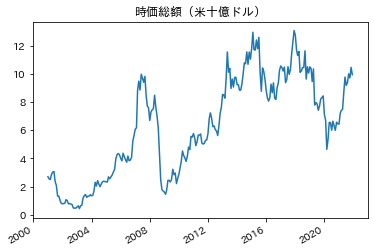

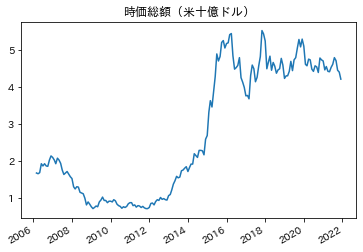

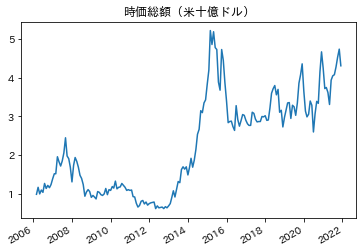

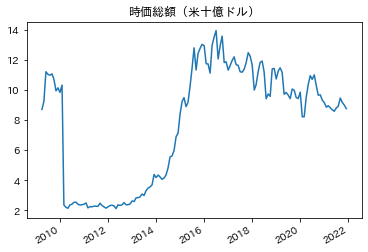

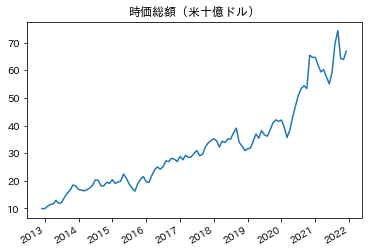

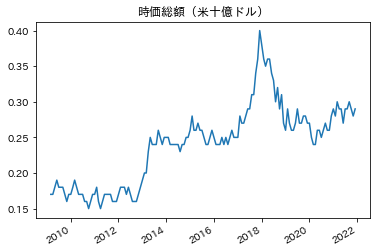

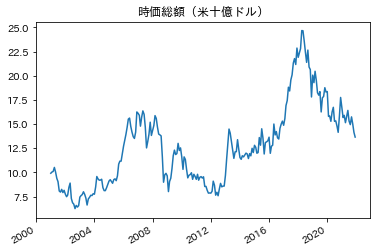

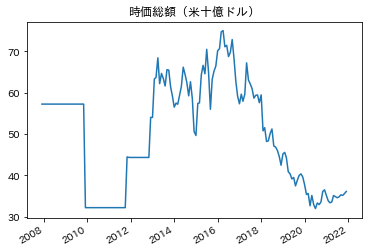

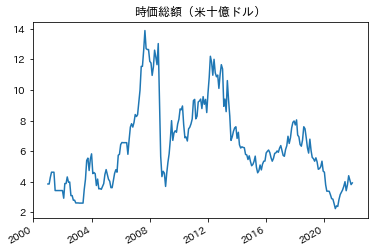

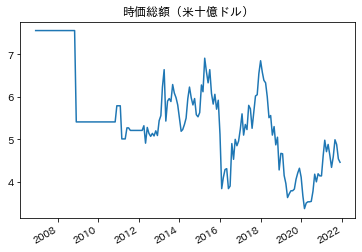

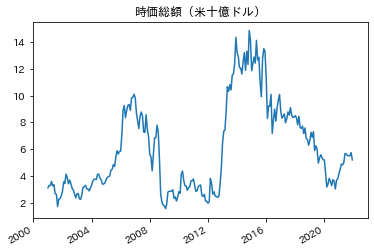

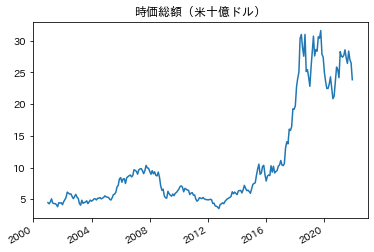

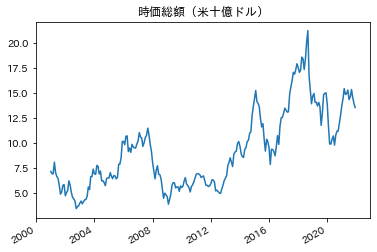

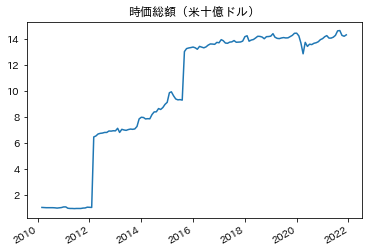

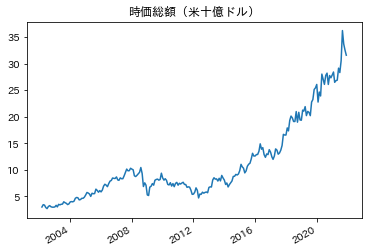

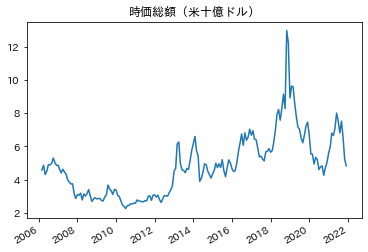

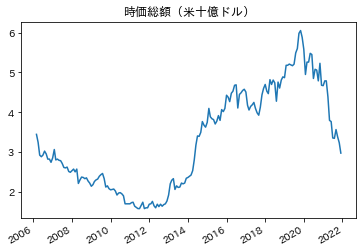

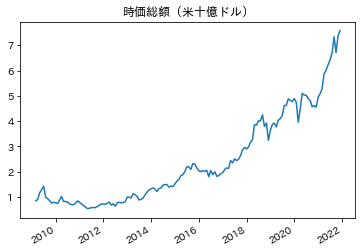

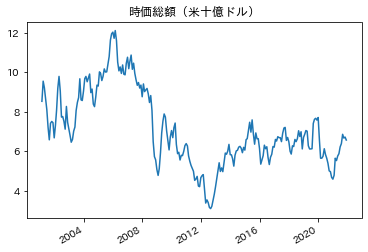

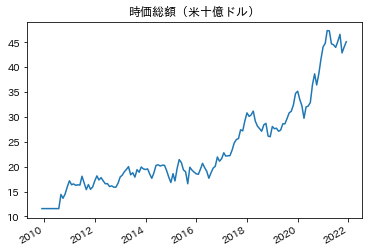

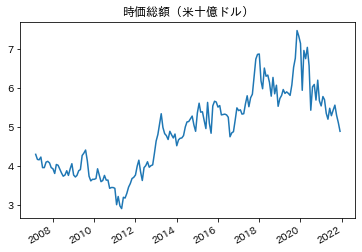

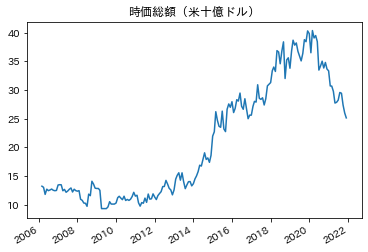

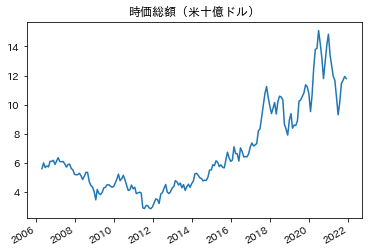

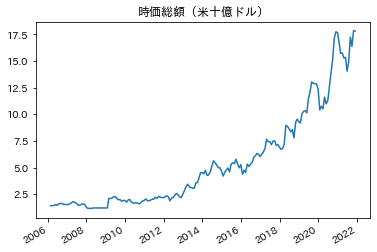

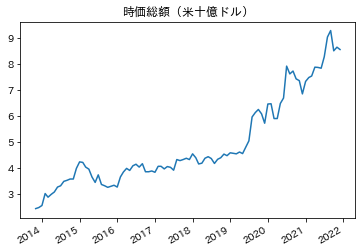

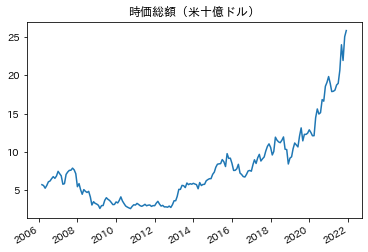

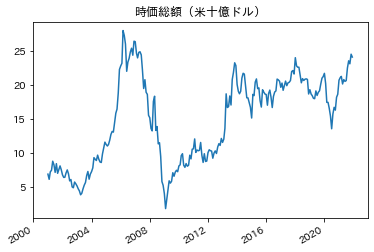

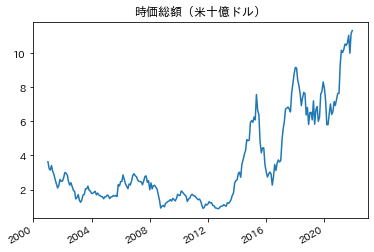

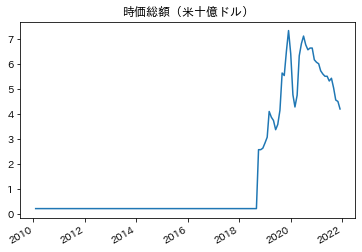

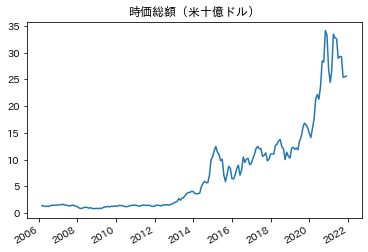

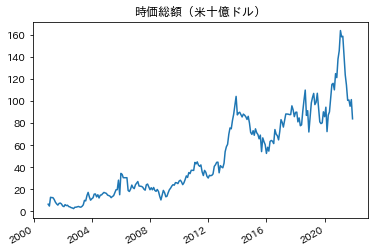

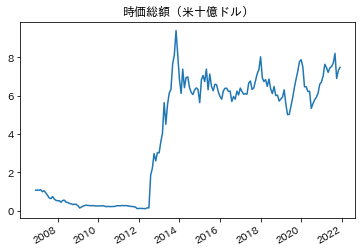

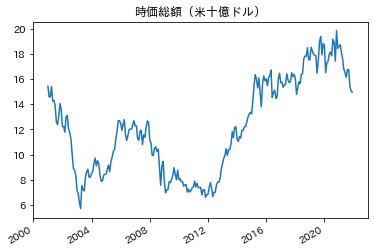

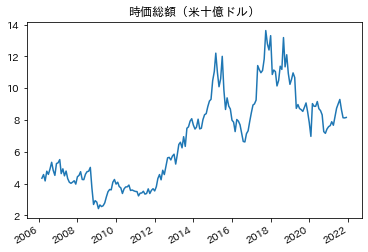

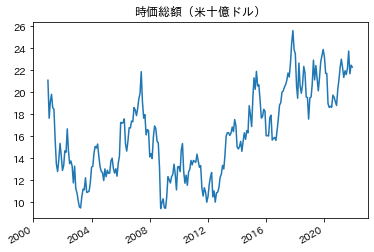

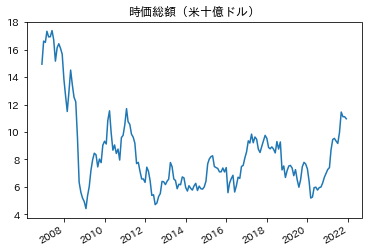

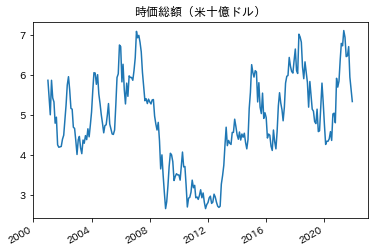

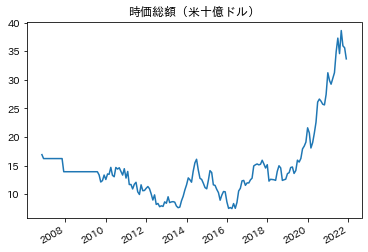

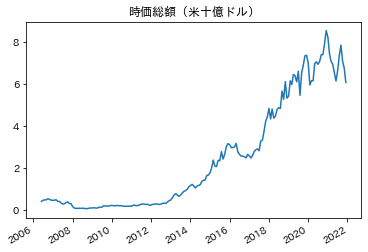

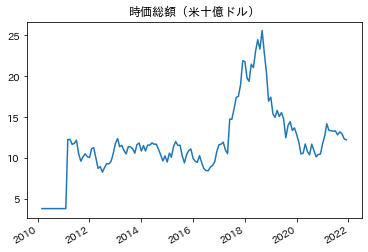

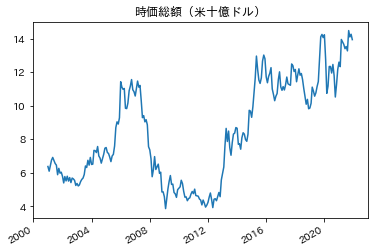

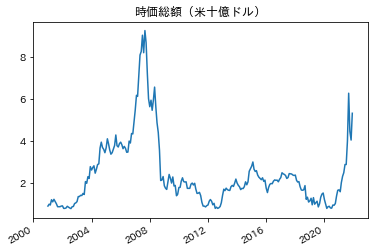

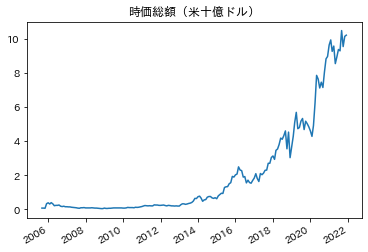

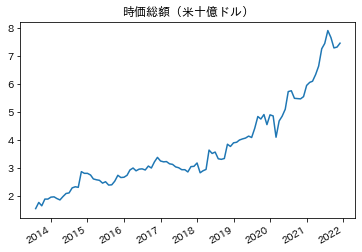

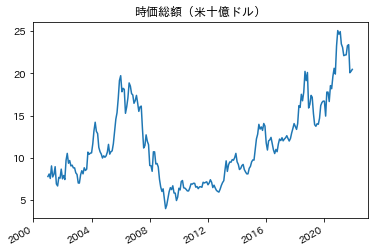

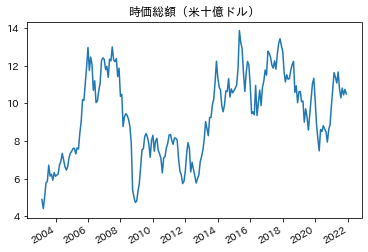

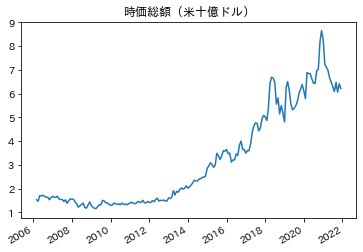

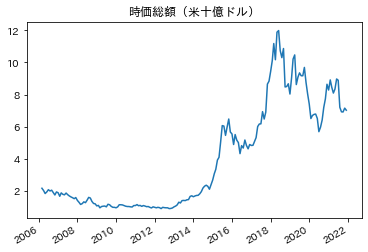

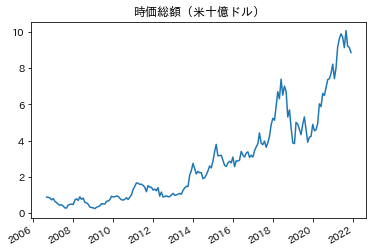

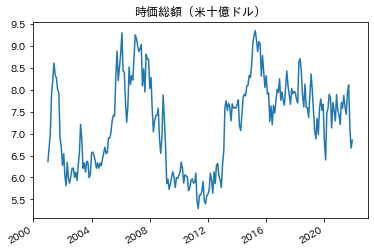

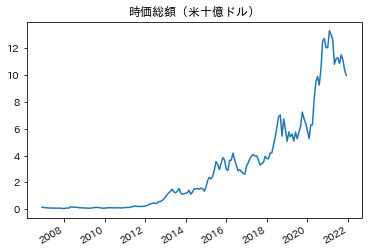

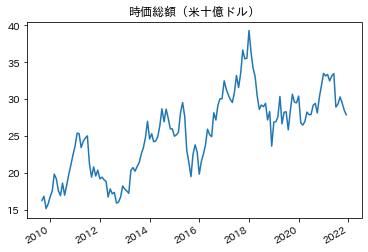

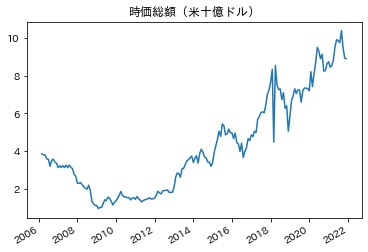

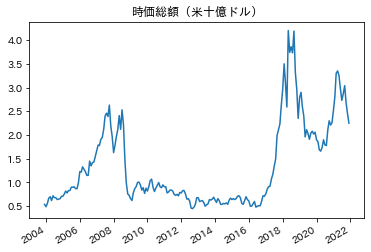

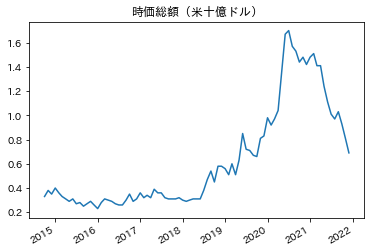

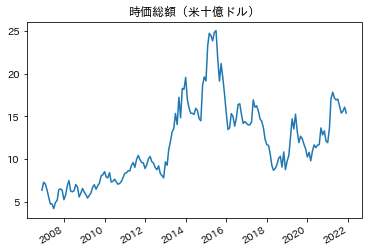

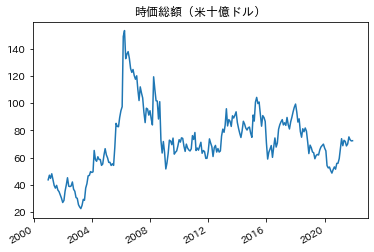

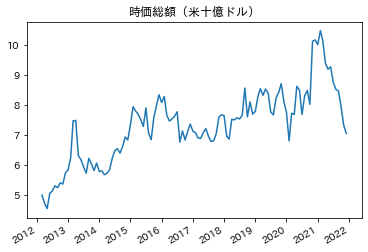

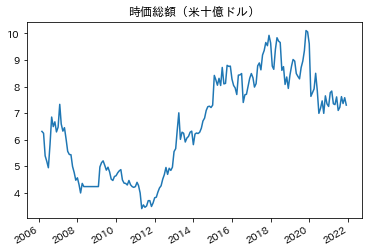

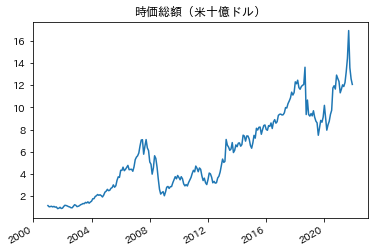

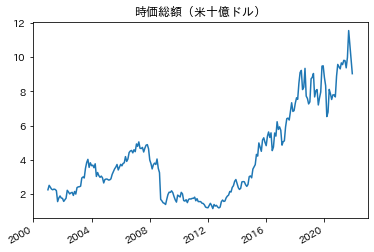

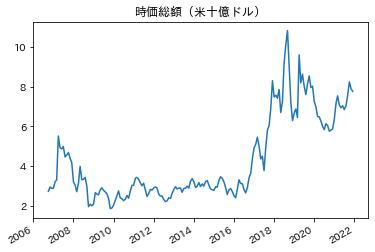

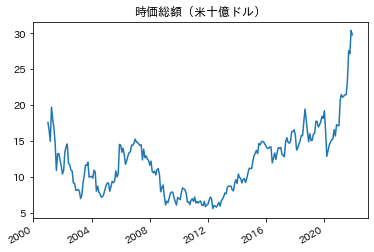

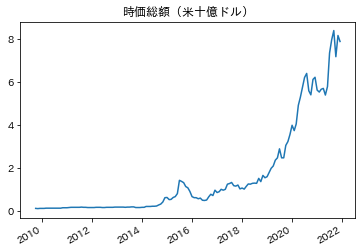

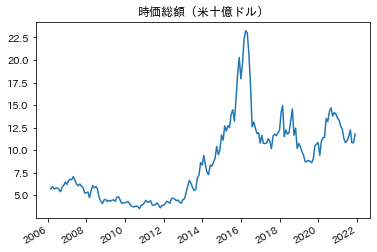

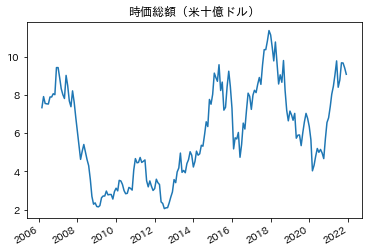

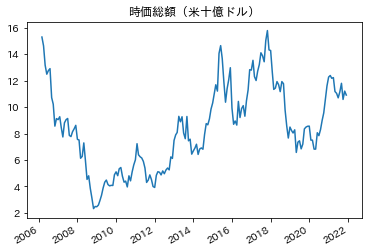

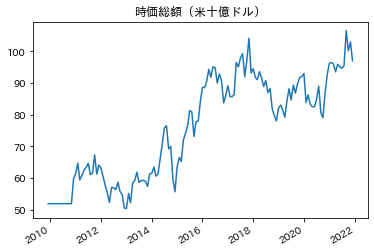

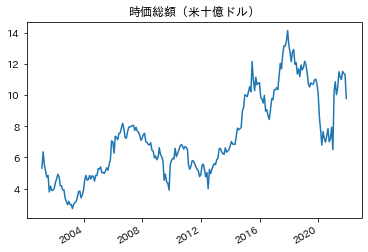

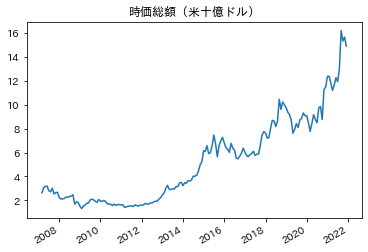

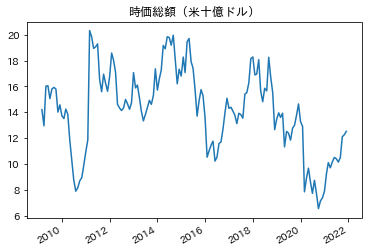

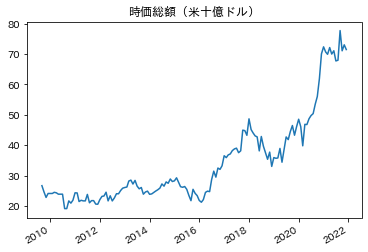

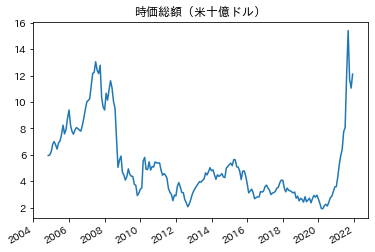

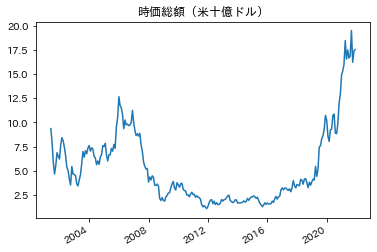

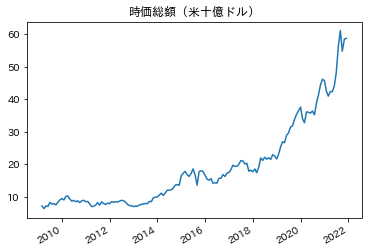

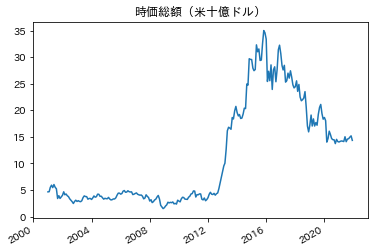

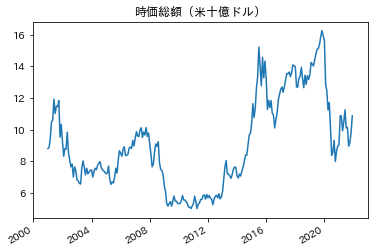

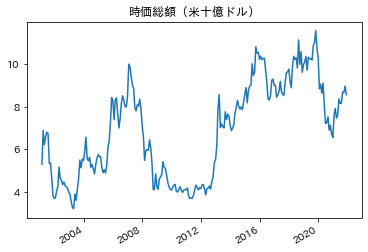

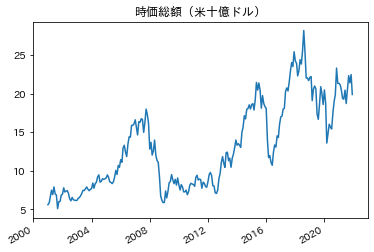

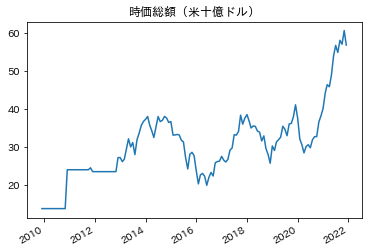

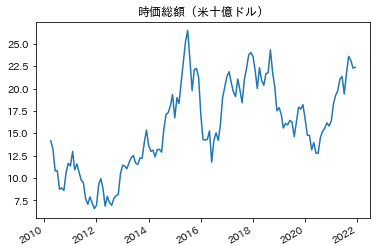

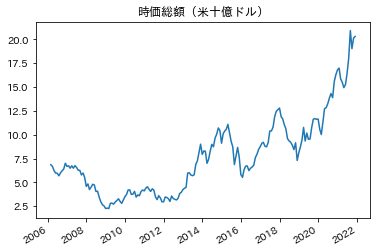

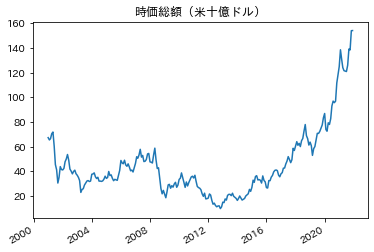

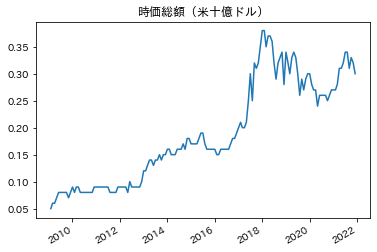

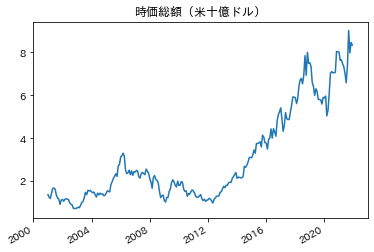

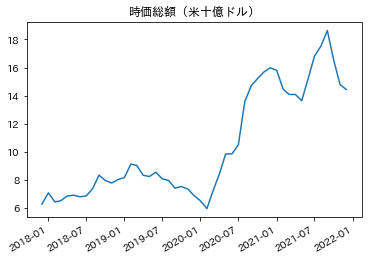

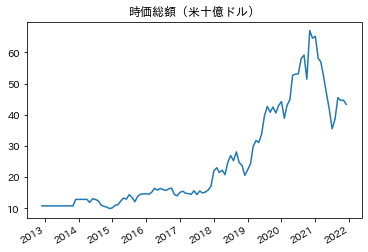

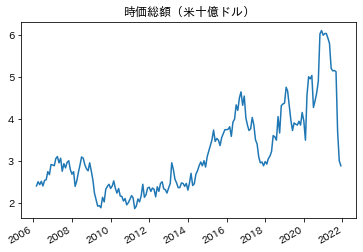

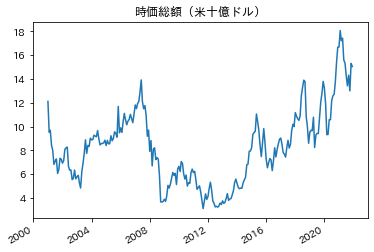

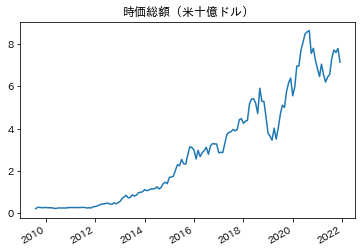

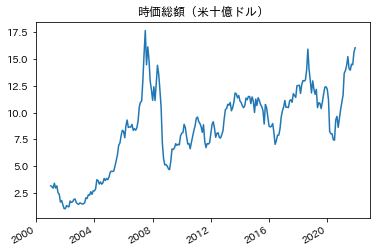

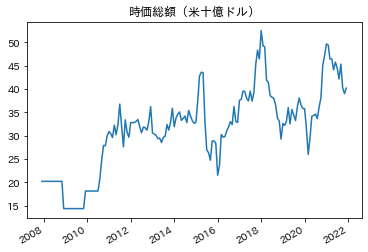

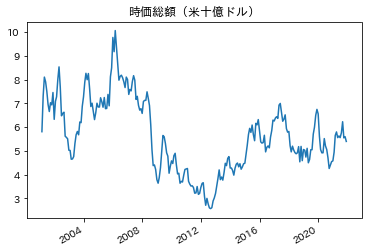

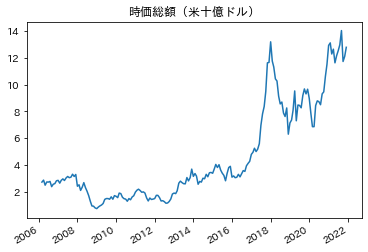

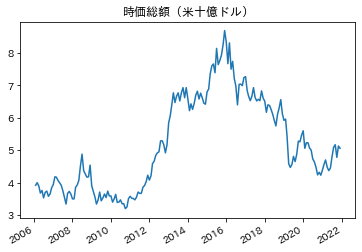

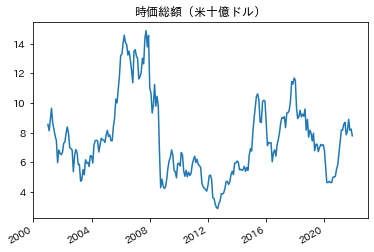

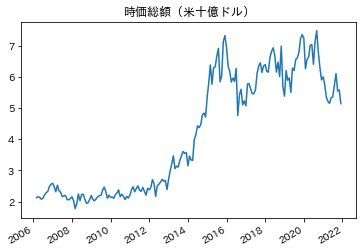

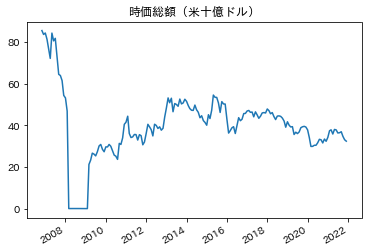

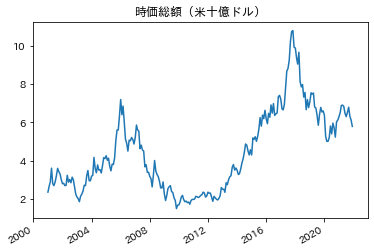

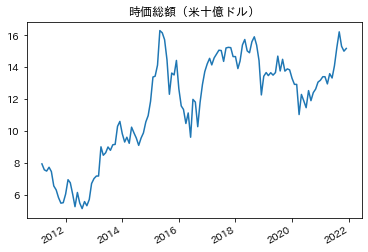

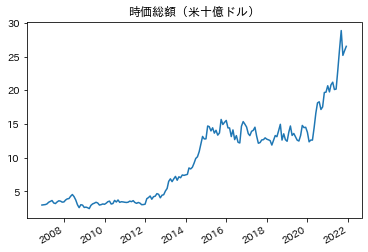

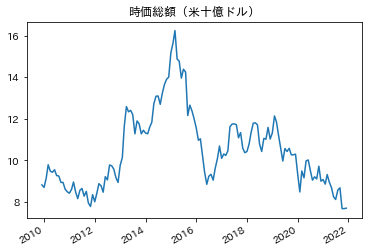

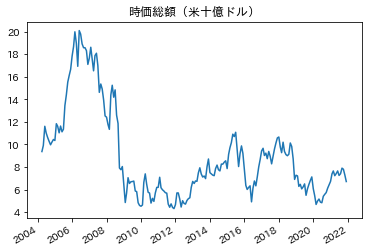

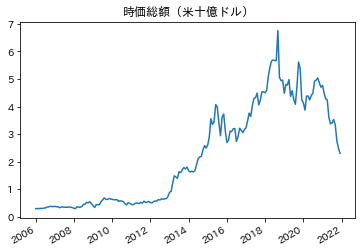

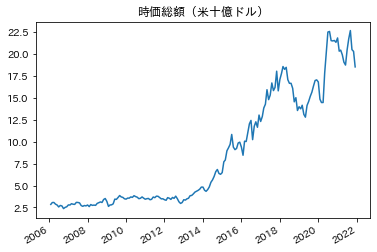

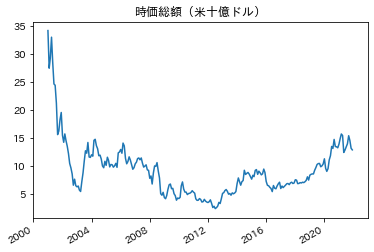

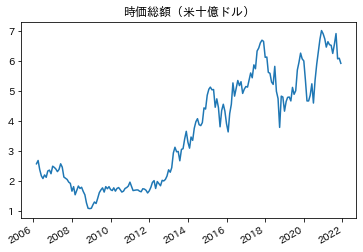

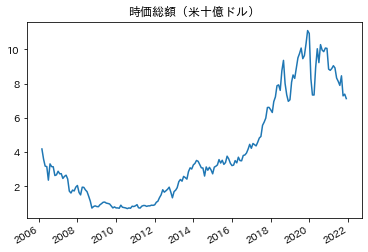

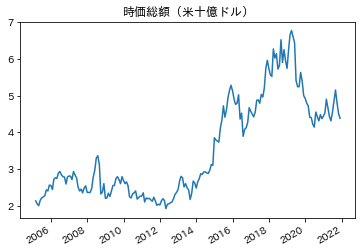

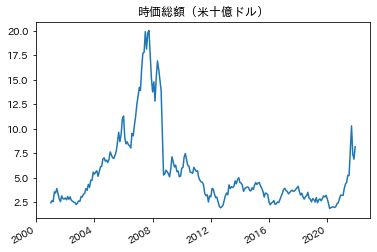

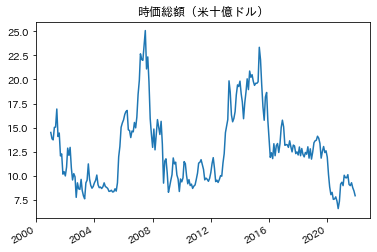

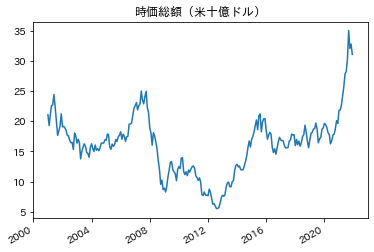

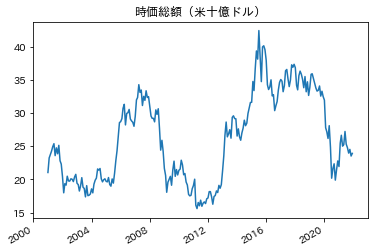

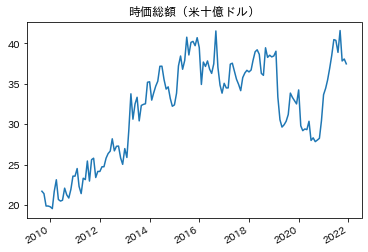

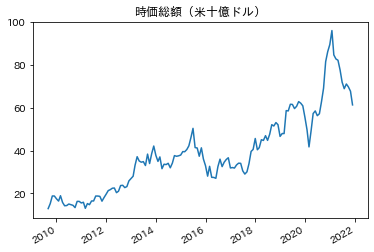

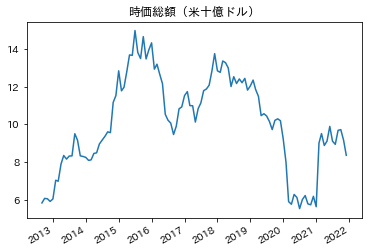

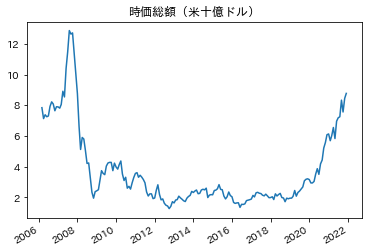

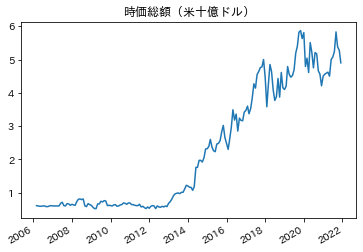

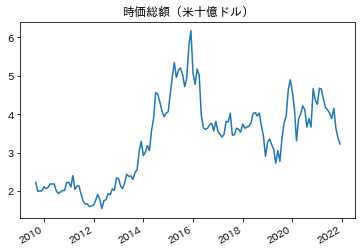

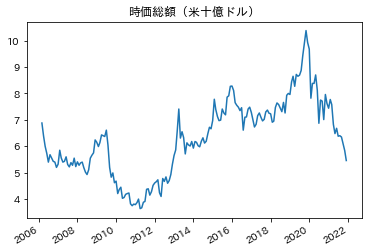

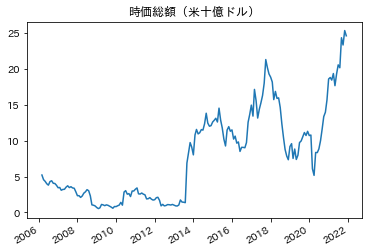

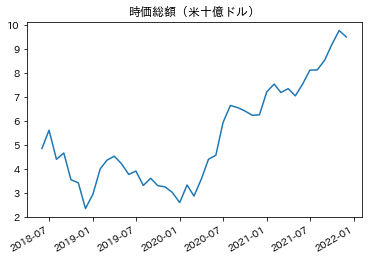

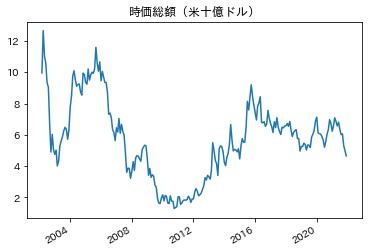

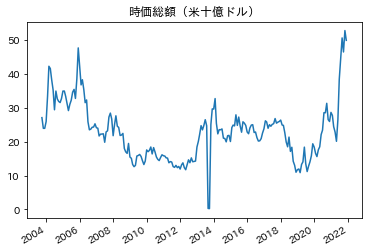

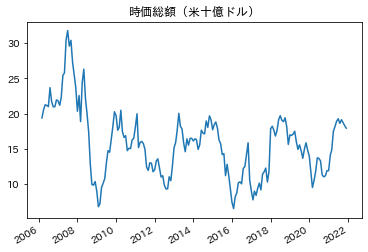

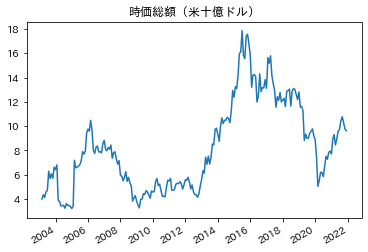

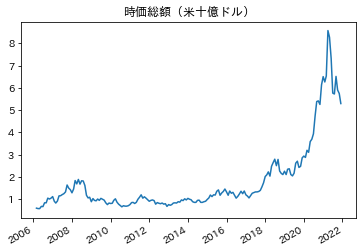

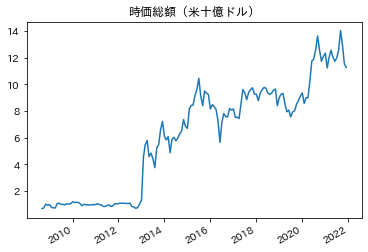

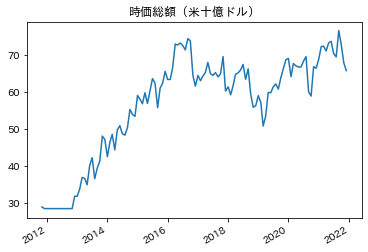

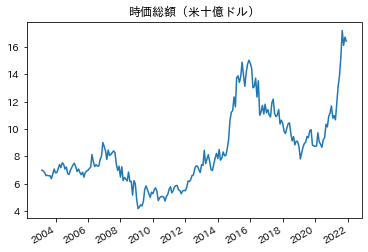

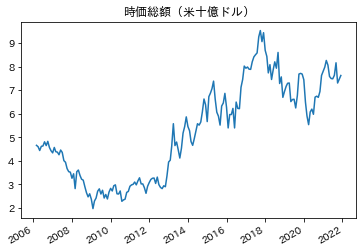

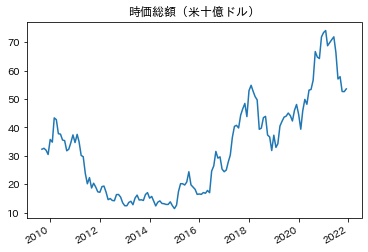

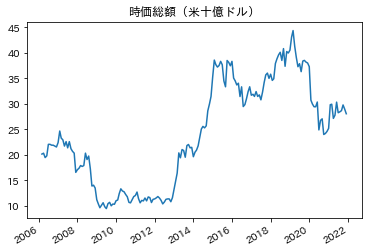

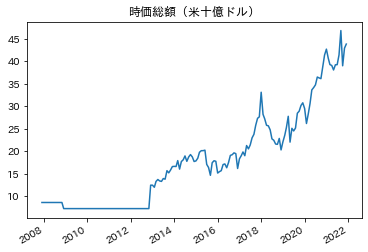

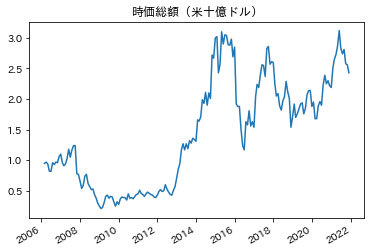

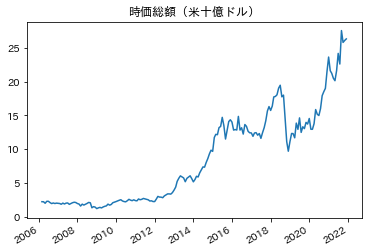

In [2]:
# グラフの描画
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import japanize_matplotlib

for i in range(len(json_load)):
    info = json_load[i]
    code = info["company_code"]
    x = []
    y = []
    for j in range(len(info["value"])):
        if(float(info["value"][j][1]) != 0):
            year, month = info["value"][j][0].split("-")
            x.append(pd.to_datetime(year+"-"+month))
            y.append(float(info["value"][j][1]))
    fig = plt.figure()
    fig.patch.set_alpha(1)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,y)
    plt.gcf().autofmt_xdate()
    ax.set_title("時価総額（米十億ドル）")
    plt.show()
    fig.savefig("./graph_image/"+code+".png")

In [3]:

# 順位情報の保存
for i in range(len(json_load[0]["value"])):
    ranking = []
    for j in range(len(json_load)):
        print(i,j)
        ranking.append([float(json_load[j]["value"][i][1]), json_load[j]["company_code"]])
    ranking.sort(reverse=True)
    
    for rank in range(len(ranking)):
        for company in range(len(json_load)):
            if(ranking[rank][1] == json_load[company]["company_code"]):
                json_load[company]["value"][i].append(rank+1)
print(json_load)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [4]:
with open("test_with_standing.json", "w") as f:
    json.dump(json_load, f , indent=4, ensure_ascii=False)